In [10]:
import unittest
from unittest.mock import patch, call
import time 
import matplotlib.pyplot as plt 

## Introduction

This report will examine the implementation of linked lists, and two abstract data types, these being queues and stacks. In particular a singly linked list will be implemented and some example operations will be performed, along with tests of execution times. Both stacks and queues will also be implemented with the use of arrays, the running times of their key operations will be tested and through this investigation we will be able to determine and discuss the time comlpexities of these algorithms and how they behave with increasing input. As well as this a number of example operations will be implemented to examine the behaviour of stack and queue operations. All plots as produced by my machine will be attached seperately for viewing. The appendix at the end of this report will contain all the unit tests of the preceding algorithms which have been implemented. 

## 1.1 Implementing singly linked list interface


Firstly we will look at the implementation of a singly linked list interface. This implementation involves the use of two classes, these being *Node* and *myLinkedList*. The *Node* class takes two elements in its constructor, these being *element* which stores the past data point and *next* which stores the pointer to the nodes successor in the linked list. These nodes are then threaded together using the myLinkedList class, this class acts as a wrapper which wraps over the nodes and provides an interface through which the user can add nodes, remove nodes and traverse the linked list. The *myLinkedList* constructor sets the head of the linked list to None.

Five methods in total are implemented in the myLinkedList class:
- ***add_first*** - adds a node at the beginning of the linked list. This is done by setting the pointer of the node to be inserted to the current head of the linked list and then setting the head pointer to the new node. This operation has time complexity of O(1).

- ***add_last*** - adds a node at the end of the linked list. This is done by first checking if the linked list is empty, if so then the head will point to the new node . Otherwise the list is traversed until the final node is reached and then the pointer of the last node will point to the new node to be insterted. The time complexity of this operation is O(n) where n represents the number of nodes present in the linked. This is due to the fact that the function must traverse until the end of the list. This operation can be optimized using a stored tail pointer, this would result in a time complexity of O(1).

- ***list_traversal*** - Traverses the linked list and appends each element to a list which is then returned for the user to see. This operation has time complexity O(n) for the same reasons as above.

- ***remove_first*** - Removes the first node of the linked list. This is done by firstly checking if the linked list is empty, if so an error message will appear. Otherwise the head pointer is moved to the next node such that this node becomes the first element in the linked list. This operation has time complexity O(1)

- ***size*** - Returns the size of the linked list. This is done by traversing the linked list until the final node is reached, after each loop a counter will increase by one and the total sum is returned. This operation has time complexity O(n) as we must traverse the linked list in order to find the size, therefore as input size increases so too will execution time of this operation. 

- ***isEmpty*** - Checks whether or not the linked list is empty. this is done by checking if the head of the linked list is None. This operation has time complexity O(1).

In [16]:
class Node:
    def __init__(self, element):
        #storing the past element point.
        self.element = element
        #storing the pointer to the next node.
        #set to none as the last pointer in the linked list will always have its pointer set to None
        self.next = None
        
        
#wrapper class that wraps over the nodes
class myLinkedList(Node):
    #creating constructor 
    def __init__(self):
        #placeholder that points to the first element in the list 
        self.head = None

    #method that adds element at the front of the linked list 
    def add_first(self,new_element):
        
        #creating the new node 
        New_Node = Node(new_element)
        #set the current head as the next node of the new node
        New_Node.next = self.head
        #head now points to the new node
        self.head = New_Node
    
    #method that adds element at the end of the linked list
    def add_last(self, element):
        #create the new node
        New_Node = Node(element)
        #check if linked list is empty
        #if so point head to new node 
        if self.head is None:
            self.head = New_Node
            return
        
        #if linked list is not empty then traverse list until last node 
        #set the next node of the last node as the new node
        else:
            current_Node = self.head
            while current_Node.next :
                current_Node = current_Node.next
            current_Node.next = New_Node

    #method that traverses the linked list and prints the elements at each node
    def list_traversal(self):
        
        #check if linked list is empty 
        #print error message 
        if self.head is None:
            print("no elements in this linked list")
            return 
        #create empty list 
        items = []
        #set the current node to the head of the linked list 
        #traverse the linked list and append the data of each node to the list 
        current_Node = self.head
        while current_Node:

            items.append(current_Node.element)  
            current_Node = current_Node.next

        return items
 
    #method that removes the first element of the linked list 
    def remove_first(self):
        
        #check if lined list is empty 
        #return error message if so 
        if self.head == None:
            return "Error: Linked List is Empty"
        
        #head pointer moved to next node 
        self.head = self.head.next
        return self.head

    #method that returns the size of the linked list 
    def size(self):
        #traverse the linked list and increase the size variable by one for each loop 
        #return size
        current_Node = self.head
        size = 0
        while current_Node:
            size+=1
            current_Node = current_Node.next
        return size

    #method that returns true if the linked list is empty 
    def isEmpty(self):
        #if head of linked list is none the linked list is empty 
        if self.head == None:
            return "linked list is empty"
        #otherwise it is not empty 
        else:
            return "linked list is not empty"

## Linked list operations

We will test the operations of the *myLinkedList* class. The content of the linked list will be printed after each operation using the *list_traversal* method to show the functionality of the methods and how they affect the linked list. The output of this implementation can be seen below, all methods work as they should. See the appendix of this report for unit testing of these methods. 

In [3]:
if __name__=='__main__':
    
    #creating empty linked list 
    list = myLinkedList()
     
    #adding node at the end     
    list.add_last(1)
    print(list.list_traversal())
    
    #adding node at the front       
    list.add_first(2)
    print(list.list_traversal())

    #check if the linked list is empty 
    print(list.isEmpty())
    
    list.add_first(3)
    print(list.list_traversal())
    
    #adding a string to the end 
    list.add_last('Cian')
    print(list.list_traversal())
    
    #removing the first node 
    list.remove_first()
    print(list.list_traversal())
    
    #adding node at the end     
    list.add_last(10)
    print(list.list_traversal())
    
    #adding node at the front     
    list.add_first(9)
    print(list.list_traversal())
    
    #removing the first node 
    list.remove_first()
    print(list.list_traversal())  
    
    print("lined list size:", list.size())

[1]
[2, 1]
linked list is not empty
[3, 2, 1]
[3, 2, 1, 'Cian']
[2, 1, 'Cian']
[2, 1, 'Cian', 10]
[9, 2, 1, 'Cian', 10]
[2, 1, 'Cian', 10]
lined list size: 4


## Testing Running Time 

## *add_last*

The majority of the Linked lists methods have time complexity of O(1) and therefore will produce a constant function plot when execution times are checked against increasing input size. However it would be interesting to check the execution times of *add_last* against increasing input size due to the fact that this operation has time complexity of O(n). Below we can see the results produced when using the *timeit* module to check the execution time of *add_last* for an increasing number of nodes. As we can see this produces a linear plot as expected, due to the fact that the function must traverse until the end of the list in order to add a new node. Therefore as the size of the linked list increases, so too does the execution time in a linear fashion. This operation can be optimized using a stored tail pointer, this would then result in a time complexity of O(1).


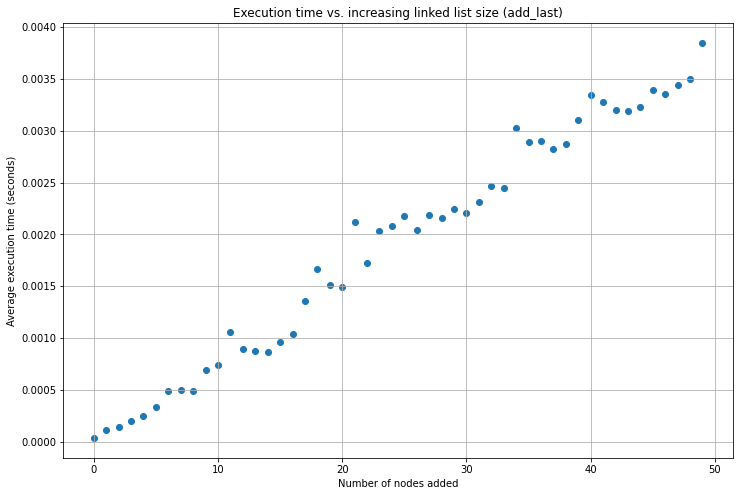

In [19]:
execution_times = []
LinkedList = myLinkedList()
for i in range(0,50): 
    #Timeit Result calculated and stored in time variable
    time = %timeit -q -o -n 100 LinkedList.add_last(i)
    #appending the Timeit results to the list 
    execution_times.append(time) 
               
#Initialize empty list for the average execution times 
average_execution_times = []

#for loop iterating over the Timeit Results 
for i in range(0,50):
    # .average attribute of timeit results used to create a list of the average exection times 
    average_execution_times.append(execution_times[i].average)

#plotting results
plt.rcParams['figure.figsize'] = [12, 8]              
plt.xlabel('Number of nodes added') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. increasing linked list size (add_last)" )
plt.scatter([x for x in range(0,50)], average_execution_times) 
plt.grid() 
plt.savefig("1. Execution time vs. increasing linked list size (add_last).png")
plt.show() 

## *add_first*

Below we can see the same test of running time as input size grows for the *add_first* method, this produces a constant plot. This function has time complexity of O(1) and therefore this plot is as expected. 

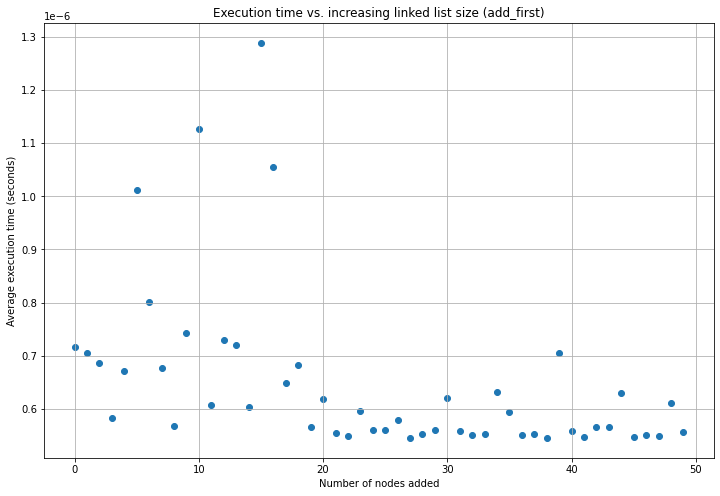

In [18]:
execution_times = []
LinkedList = myLinkedList()
for i in range(0,50): 
    #Timeit Result calculated and stored in time variable
    time = %timeit -q -o -n 100 LinkedList.add_first(i)
    #appending the Timeit results to the list 
    execution_times.append(time) 
               
#Initialize empty list for the average execution times 
average_execution_times = []

#for loop iterating over the Timeit Results 
for i in range(0,50):
    # .average attribute of timeit results used to create a list of the average exection times 
    average_execution_times.append(execution_times[i].average)

#plotting results
plt.rcParams['figure.figsize'] = [12, 8]              
plt.xlabel('Number of nodes added') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. increasing linked list size (add_first)" )
plt.savefig("2. Execution time vs. increasing linked list size (add_first).png")
plt.scatter([x for x in range(0,50)], average_execution_times) 
plt.grid() 
plt.savefig("2. Execution time vs. increasing linked list size (add_first).png")
plt.show() 

## 1.2 Stack ADT and Queue ADT

### Stack ADT
A stack is an abstract data type that serves as a collection of elements. Stacks are a Last-in-first-out data structure (LIFO) as stacks only allow operations to occur at one end of the stack. For this reason, only the top element of the stack can be accessed at any given time. A stack can be implemented in python with the use of linked lists or arrays. For the purposes of this assignment we will be implementing stacks with the use of arrays, arrays allow for the same functionality as a stack as we can append and remove items from the array, combining this with a number of other methods we can then mimic the functionality of a stack abstract data type. Stacks can also be implemented with the use of linked lists, however, linked lists can prove to be a messy and computationally expensive process and therefore arrays provide a more elegant solution. The key and support operations of the stack ADT are as outlined below, all operations are of time complexity O(1):

**Key operations:**
- ***push***  the push method adds an element to the collection.
- ***pop*** removes the most recently added element that was not yet removed.

**Support operations:**
- ***isEmpty*** - returns true if the stack is empty 
- ***top_stack*** - returns the top element of the stack 
- ***size*** - returns the size of the stack 
- ***show*** - returns all elements in the stack 

**Real world Examples:** 
- A typical real world example of a stack is a stack of plates in a restaraunt kitchen. If you were to add a plate to the pile you would add it to the top. In order to remove a plate from the pile you would take the top plate. Therefore it is the plate at the top of the pile that can be accessed and modified. If you wanted to get the plate at the bottom of the pile you would have to remove all plates on top of it in order to reach it. It is the last plate that is placed on top of the pile that is the first to be removed.
- Another example would be the loading of a shot gun, each bullet is loaded sequentially and it is therefore the last bullet in that is the first to get fired. If you want to remove a bullet from the catridge you would have to fire the gun. If you wanted to get to the bottom of the cartridge you would have to fire all the bullets to reach the bottom. 


### Queue ADT
A queue is a collection of elements that are maintained in a sequence and can be altered by the addition of elements at one end of the sequence and the removal of elements from the other end. Queues are a First-in-First-out (FIFO) data structure and therefore operations can occur at both ends of the queue. Elements can be added to the rear of the queue and removed from the top of the queue. Once again these can be implemented with the use of arrays for the same reasons as above. A number of the support operations overlap between stacks and queues and for this reason for the purposes of this assignment we will make the class queue a subclass of stack such that it can inherit the support operations which are shown below, once again all operations are of time complexity O(1), except for dequeue which has time complexity O(n), this will be investigated further later on. 

**Key operations:**
- ***enqueue***  The addition of an element at the end of the queue.
- ***dequeue*** The removal of an element from the top of the queue.

**Support operations:**
- ***isEmpty*** - returns true if the queue is empty 
- ***top_queue*** - returns the element at the top of the queue
- ***size*** - returns the size of the queue 
- ***show*** - returns all elements in the queue 

**Real world Examples:** 
- A drive-thru restaraunt is a real world example of a queue. As cars join the queue for the restaraunt it is the first car to arrive that will be the first one to get out of the queue. Cars join at the rear of the queue and cars leave from the top of the queue. Each car must wait until they reach the top of the queue before their order is taken. 
- Another example would be waiting on hold for tech support. When you call a tech support line, you are put on hold and you join the rear of the queue, those at the top of the queue are prioritized and will be out of the queue before you. Therefore the first person into the queue will be the first person out, people join the queue sequentially and each person must wait until they reach the top of the queue before their call is taken.

## 2.1 Stack ADT implementation

The stack will be implemented using arrays as explained above. The array mimics the functionality of a stack, with the last element in the array representing the top of the stack. Therefore elements can be appended or removed from the top of the array, this then represents the push and pop functionality. The support operations are also implemented and an example implementation of the operations can be seen below. All unit tests of this class are contained in the appendix of this report.  

In [2]:
class Stack:
    #constructor 
    def __init__(self):
        #creates an empty array 
        self.elements = []

    #method to check if stack is empty 
    def isEmpty(self):
        #returns true if stack is empty 
        return self.elements == []

    #method to add an element to the top of the stack 
    def push(self, element):
        #appends element to the array
        self.elements.append(element)

    #method to remove element from the top of the stack 
    def pop(self):
        #checks if stack is empty
        if self.isEmpty():
            return "Empty Error"
        #removes the last element of the array 
        self.elements = self.elements[:-1]

    #method to see the top element of the stack 
    def top_stack(self):
        #checks if stack is empty
        if self.isEmpty():
            return "Empty Error"
        #returns the last element of the array 
        return self.elements[len(self.elements)-1]

    #method to return the size of the stack 
    def size(self):
        if self.isEmpty():
            return "Empty Error"
        #returns the length of the array 
        return len(self.elements)
    
    #method to show the stack 
    def show(self):
        if self.isEmpty():
            return "Empty Error"
        #prints all elements of the array 
        return self.elements

## Testing Running Time 

Because it takes a single step to access an item of an array via its index, or add/remove an item at the end of an array, the complexity for accessing, pushing or popping a value in an array is O(1). As can be seen in the example below, the push operation execution time remains constant as the stack size increases. 

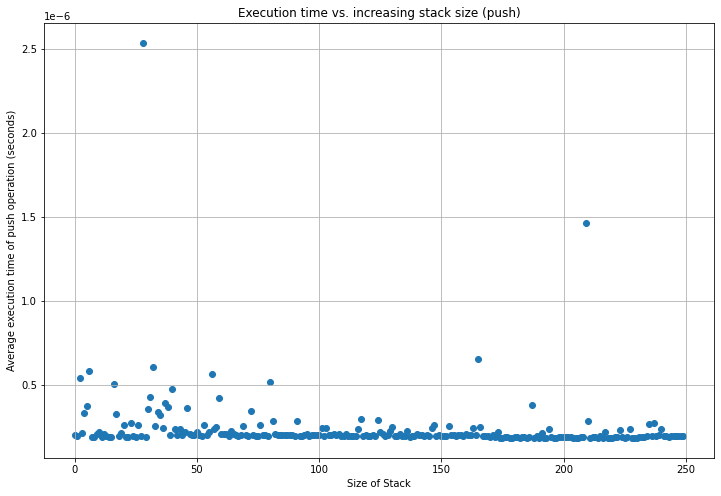

In [7]:
execution_times = []
S = Stack()
for i in range(0,250): 
    #Timeit Result calculated and stored in time variable
    time = %timeit -q -o -n 100 S.push(i)
    #appending the Timeit results to the list 
    execution_times.append(time) 
               
#Initialize empty list for the average execution times 
average_execution_times = []

#for loop iterating over the Timeit Results 
for i in range(0,250):
    # .average attribute of timeit results used to create a list of the average exection times 
    average_execution_times.append(execution_times[i].average)

#plotting results
plt.rcParams['figure.figsize'] = [12, 8]              
plt.xlabel('Size of Stack') 
plt.ylabel('Average execution time of push operation (seconds)') 
plt.title("Execution time vs. increasing stack size (push)" )
plt.scatter([x for x in range(0,250)], average_execution_times) 
plt.grid() 
plt.savefig("3. Execution time vs. increasing stack size (push).png")
plt.show() 

## 2.2 Stack Operations Example

Using the implementation of the stack ADT above we can now execute the series of stack operations as per the assignment instructions. These include 9 push and 8 pop operations, in order to get an idea of how the stack looks after each operation we have used the show method to print the stack. After these 17 operations are executed the stack is of size 1 i.e it contains only one element. 

In [8]:
#create empty stack 
s=Stack()

#check that the stack is empty 
print("Stack empty:", s.isEmpty())

#series of operations as per the assignment instructions
#show method implemented after each operation to show the changes in the queue 
s.push(5)
print(s.show())
s.push(3)
print(s.show())
s.pop()
print(s.show())
s.push(2)
print(s.show())
s.push(8)
print(s.show())
s.pop()
print(s.show())
s.pop()
print(s.show())
s.push(9)
print(s.show())
s.push(1)
print(s.show())
s.pop()
print(s.show())
s.push(7)
print(s.show())
s.push(6)
print(s.show())
s.pop()
print(s.show())
s.pop()
print(s.show())
s.push(4)
print(s.show())
s.pop()
print(s.show())
s.pop()
print(s.show())
print("Final stack size:", s.size())

Stack empty: True
[5]
[5, 3]
[5]
[5, 2]
[5, 2, 8]
[5, 2]
[5]
[5, 9]
[5, 9, 1]
[5, 9]
[5, 9, 7]
[5, 9, 7, 6]
[5, 9, 7]
[5, 9]
[5, 9, 4]
[5, 9]
[5]
Final stack size: 1


## 2.3 Stack Operations Example

We take an initially empty stack and perform a toal of 35 push operations, 15 top operations and 10 pop operations. 3 of the pop operations raised empty errors, these were caught and ignored, this means that 3 of the operations were performed on an empty stack, therefore they will be performed on the initial empty stack. After all of these operations, the current size of the stack will be **28**. The implementaion of these operations is seen below using for loops, we are trying to find the size of the final stack and therefore the order of operations does not matter.

In [3]:
#create an empty stack 
S=Stack()
print("stack is empty:", S.isEmpty(), '\n')

#perform 3 pop operations on an empty stack
print("Now performing 3 pop operations on empty stack" )
[S.pop() for i in range(0,3)]

print("current stack size:",S.size(), '\n')

#perform 35 push operations
print("Now performing 35 push operations on the stack")
[S.push(i) for i in range(0,35)]

print("current stack size",S.size(), '\n')

#perform 7 pop operations that will not return empty errors
print("Now performing 7 pop operations on the stack")
[S.pop() for i in range(0,7)]

print("current stack size",S.size(), '\n')
    
#perform 15 top operations
print("Now performing 15 top operations on the stack")
[S.top_stack() for i in range(0,15)]

print("current stack size",S.size(), '\n')

#print the stack size 
print("Final size of stack:", S.size())

stack is empty: True 

Now performing 3 pop operations on empty stack
current stack size: Empty Error 

Now performing 35 push operations on the stack
current stack size 35 

Now performing 7 pop operations on the stack
current stack size 28 

Now performing 15 top operations on the stack
current stack size 28 

Final size of stack: 28


## 3.1 Queue ADT Implementation

The queue ADT implementation is similar to that of the stack ADT, however unlike a stack the addition and removal of elements do not occur at the same side of the sequence, but rather at opposite ends. Therefore, the queue ADT is implemented as a subclass of the stack ADT such that it can inherit the support operations methods such as show, isEmpty and size. Three new methods are implemented, these being: 
- ***enqueue***: This has the exact same functionality as the push operation from the stack ADT, in that it adds an element to the end of the sequence. But to avoid method name ambiguity we must give it an alternative name.

- ***dequeue*** This removes the element at the top of the queue i.e. it removes the element at the start of the sequence 

- ***top_queue*** returns the element at the top of the queue, this cannot be inherited from stack as it must return the first element in the array rather than the last.

Once again this implementation was done using arrays. For the purposes of this assignment we will assume that the queue  does not have a specific capacity. Regardless of how many elements are already contained, a new element can always be added. 

In [4]:
class queue(Stack):
    #constructor
    def __init__(self):
        #creates and empty array
        self.elements = []
        
    #method to add an element to the end of the queue
    def enqueue(self, element):
        #adds an element at the end of the array
        self.elements.append(element)
        
    #method to remove an element from the top of the queue
    def dequeue(self):
        #checks if queue is empty
        if self.isEmpty():
            return "Empty Error"
        #removes the first element in the array 
        self.elements = self.elements[1:]
        
    #method to see the top element of the stack 
    def top_queue(self):
        #checks if stack is empty
        if self.isEmpty():
            return "Empty Error"
        #returns the first element of the array 
        return self.elements[0]

## Testing Running Time 

## *enqueue*

Similar to the stack implementation, due to the fact that it takes a single step to access an item of an array via its index, or add/remove an item at the end of an array, the complexity for enqueue is O(1). As can be seen in the example below, the enqueue operation execution time remains constant with increasing input size.


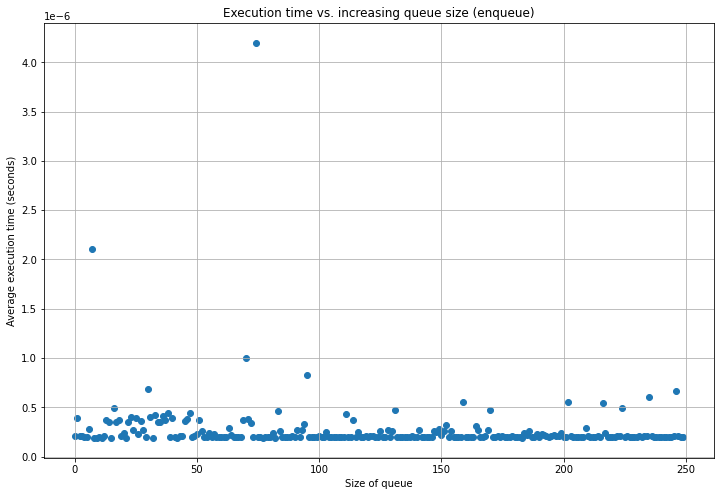

In [11]:
execution_times = []
Q = queue()
for i in range(0,250): 
    #Timeit Result calculated and stored in time variable
    time = %timeit -q -o -n 100 Q.enqueue(i)
    #appending the Timeit results to the list 
    execution_times.append(time) 
               
#Initialize empty list for the average execution times 
average_execution_times = []

#for loop iterating over the Timeit Results 
for i in range(0,250):
    # .average attribute of timeit results used to create a list of the average exection times 
    average_execution_times.append(execution_times[i].average)

#plotting results
plt.rcParams['figure.figsize'] = [12, 8]              
plt.xlabel('Size of queue') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. increasing queue size (enqueue)" )
plt.scatter([x for x in range(0,250)], average_execution_times) 
plt.grid() 
plt.savefig("4. Execution time vs. increasing queue size (enqueue).png")
plt.show() 

## *dequeue*

However, the *dequeue* operation has time complexity of O(n) , this is due to the fact that the element at the front of the queue is deleted, but all the remaining elements have to be shifted to the left by one position in order for the dequeue operation to delete the second element from the left on another dequeue operation. Therefore as the number of dequeue operations increases, so too does the execution time of the function. This is evident from the plot below, where we see a linear plot when execution time of the dequeue operation is plotted against increasing queue size.

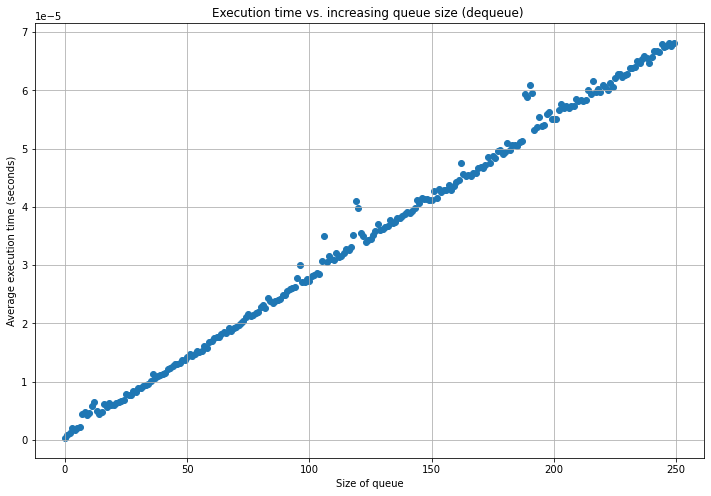

In [12]:
execution_times = []
for i in range(0,250): 
    Q = queue()
    #create queue
    [Q.enqueue(i) for i in range(0,250)]
    #Timeit Result calculated and stored in time variable
    time = %timeit -q -o -n 100 [Q.dequeue() for x in range(0,i)]
    #appending the Timeit results to the list 
    execution_times.append(time)             
#Initialize empty list for the average execution times 
average_execution_times = []
#for loop iterating over the Timeit Results 
for i in range(0,250):
    # .average attribute of timeit results used to create a list of the average exection times 
    average_execution_times.append(execution_times[i].average)
    
#plotting results
plt.rcParams['figure.figsize'] = [12, 8]              
plt.xlabel('Size of queue') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. increasing queue size (dequeue) " )
plt.scatter([x for x in range(0,250)], average_execution_times) 
plt.grid() 
plt.savefig("5. Execution time vs. increasing queue size (dequeue).png")
plt.show() 

## 3.2 Queue Operations Example

Using the implementation of the queue ADT above we can now execute the series of queue operations as per the assignment instructions. These include 9 enqueue and 8 dequeue operations, in order to get an idea of how the queue looks after each operation we have used the show method to print the queue. After these 17 operations are executed the queue is of size 1 i.e it contains only one element. 

In [13]:
#create empty queue
Q = queue()

#check that the stack is empty 
print("Queue empty:", Q.isEmpty())

#series of operations as per the assignment instructions
#show method implemented after each operation to show the changes in the queue 
Q.enqueue(5)
print(Q.show())
Q.enqueue(3)
print(Q.show())
Q.dequeue()
print(Q.show())
Q.enqueue(2)
print(Q.show())
Q.enqueue(8)
print(Q.show())
Q.dequeue()
print(Q.show())
Q.dequeue()
print(Q.show())
Q.enqueue(9)
print(Q.show())
Q.enqueue(1)
print(Q.show())
Q.dequeue()
print(Q.show())
Q.enqueue(7)
print(Q.show())
Q.enqueue(6)
print(Q.show())
Q.dequeue()
print(Q.show())
Q.dequeue()
print(Q.show())
Q.enqueue(4)
print(Q.show())
Q.dequeue()
print(Q.show())
Q.dequeue()
print(Q.show())

print("Final Queue size:", s.size())


Queue empty: True
[5]
[5, 3]
[3]
[3, 2]
[3, 2, 8]
[2, 8]
[8]
[8, 9]
[8, 9, 1]
[9, 1]
[9, 1, 7]
[9, 1, 7, 6]
[1, 7, 6]
[7, 6]
[7, 6, 4]
[6, 4]
[4]
Final Queue size: 1


## 3.3 Queue Operations Example

We take an initially empty queue and perform a total of 50 enqueue operations, 15 top operations and 15 dequeue operations on the queue. Similar to the stack operations example (2.3), 5 of the dequeue operations raised empty errors, these were caught and ignored, this means that 5 of the operations will have to be performed on an empty stack, therefore they will be performed on the initial empty stack and the remaining 10 dequeue operations will be performed on the full stack. After all of these operations, the current size of the queue will be **40**. The implementaion of these operations is seen below using for loops, we are trying to find the size of the final queue and therefore the order of operations does not matter.

In [14]:
#create an empty queue
Q = queue()
print("Queue is empty:", Q.isEmpty(), '\n')

#perform 5 dequeue operations 
print("Now performing 5 dequeue operations on empty queue" )
[Q.dequeue() for i in range(0,5)]
print("current stack size:",Q.size(), '\n')

#perform 50 enqueue operations
print("Now performing 50 enqueue operations on the queue")
[Q.enqueue(i) for i in range(0,50)]
print("current stack size:",Q.size(), '\n')

#perform 10 dequeue operations that will not return empty errors
print("Now performing 10 dequeue operations on the queue" )
[Q.dequeue() for i in range(0,10)]
print("current stack size:",Q.size(), '\n')

#perform 15 top operations
print("Now performing 15 top operations on the queue")
[Q.top_queue() for i in range(0,15)]
print("current stack size:",Q.size(), '\n')

print("Final size of queue:", Q.size())


Queue is empty: True 

Now performing 5 dequeue operations on empty queue
current stack size: Empty Error 

Now performing 50 enqueue operations on the queue
current stack size: 50 

Now performing 10 dequeue operations on the queue
current stack size: 40 

Now performing 15 top operations on the queue
current stack size: 40 

Final size of queue: 40


## 4. Conclusion

In conclusion, through analysis of these algorithms, the complexities of their processes and their inner workings have become far more apparent. It was incredibly interesting to see these implementations first hand and get a better understanding of linked lists and these abstract data types. For future work it would be interesting to implement a doubly linked list and get a better undrstanding of its functionality. As well as this it would be insightful to see how stacks and queues can be implemented with linked lists rather than arrays. Pease find attached a pdf of all relevant plots as produced at the time of analysis, and find below the unit tests carried out on the algorithms contained in this report. 

## 5. Appendix

Unit tests were performed on each of the operations for a range of inputs with known output, all tests passed successfully.

### 5.1 Unit Tests for Linked List


In [17]:
class TestAlgorithms(unittest.TestCase):
    
    def setUp(self):
        self.linked_list = myLinkedList()
     
    def test_list_traversal(self):
        #using mock calls to test list traversal, all tests are ok
        with patch('builtins.print') as mocked_print:
            self.linked_list.add_first(1)
            self.linked_list.add_first(1)
            print(self.linked_list.list_traversal())
            self.assertEqual(mocked_print.mock_calls,[call([1,1])])
            
    def test_add_first(self):
        #adding three elements to a linked list using add_first and checking against output from list_traversal
        self.linked_list.add_first(1)
        self.linked_list.add_first(2) 
        self.linked_list.add_first(3)
        self.assertEqual(self.linked_list.list_traversal(), [3,2,1])
        
    def test_add_last(self):
        #adding three elements to a linked list using add_last and checking against output from list_traversal
        self.linked_list.add_last(1)
        self.linked_list.add_last(2) 
        self.linked_list.add_last(3)
        self.assertEqual(self.linked_list.list_traversal(), [1,2,3])

    def test_remove_first(self):    
        #testing remove_first by adding one node to linked list and removing 
        #error message should show 
        self.linked_list.add_last(1) 
        self.linked_list.remove_first()
        self.assertEqual(self.linked_list.remove_first(), "Error: Linked List is Empty")

        
    def test_isEmpty_1(self):
        #checking if empty linked list is empty 
        self.assertEqual(self.linked_list.isEmpty(),'linked list is empty' ) 
        
    def test_isEmpty_2(self):
        #adding two elements to linked list and testing if empty 
        #should return appropriate message
        self.linked_list.add_first(2)
        self.linked_list.add_last(2)
        self.assertEqual(self.linked_list.isEmpty(),'linked list is not empty' )
           
    def test_size(self):
        #adding two nodes to linked list 
        #should return two 
        linked_list = myLinkedList()
        linked_list.add_first(2)
        linked_list.add_last(2)
        self.assertEqual(linked_list.size(),2) 
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_add_first (__main__.TestAlgorithms) ... ok
test_add_last (__main__.TestAlgorithms) ... ok
test_isEmpty_1 (__main__.TestAlgorithms) ... ok
test_isEmpty_2 (__main__.TestAlgorithms) ... ok
test_list_traversal (__main__.TestAlgorithms) ... ok
test_remove_first (__main__.TestAlgorithms) ... ok
test_size (__main__.TestAlgorithms) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.019s

OK


### 5.2 Unit Tests for Stack ADT

In [18]:
class TestAlgorithms(unittest.TestCase):

    def setUp(self):
        self.S = Stack ()

    def test_isEmpty1(self):
        #adding four elements to stack
        #should return False as not empty
        self.S.push(1)
        self.S.push(2)   
        self.assertEqual(self.S.isEmpty(), False)
 
    def test_isEmpty2(self):
        #empty stack so should return true 
        self.assertEqual(self.S.isEmpty(), True)
        
    def test_show(self):
        #adding 4 elements with push and checking with array 
        self.S.push(1)
        self.S.push(2)   
        self.assertEqual(self.S.show(), [1,2])
        
    def test_push(self):
        #the push operation does not return any value and therefore show will be used to check that 
        #the push operation is working correctly (show works as expected)
        self.S.push(1)
        self.S.push(2)           
        self.assertEqual(self.S.show(), [1,2])

    def test_pop(self):
        #same as above, pop does not return any value so show will be used
        #one element pushed and one popped 
        self.S.push(1)
        self.S.push(2)
        self.S.pop()
        self.assertEqual(self.S.show(), [1])

    def test_top_queue(self):
        self.S.push(1)
        self.S.push(2)
        self.S.push(3)
        self.assertEqual(self.S.top_stack(), 3)

    def test_size(self):
        self.S.push(1)
        self.S.push(2)
        self.S.push(3)
        self.assertEqual(self.S.size(), 3)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_isEmpty1 (__main__.TestAlgorithms) ... ok
test_isEmpty2 (__main__.TestAlgorithms) ... ok
test_pop (__main__.TestAlgorithms) ... ok
test_push (__main__.TestAlgorithms) ... ok
test_show (__main__.TestAlgorithms) ... ok
test_size (__main__.TestAlgorithms) ... ok
test_top_queue (__main__.TestAlgorithms) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.019s

OK


### 5.3 Unit Tests for Queue ADT

In [19]:
class TestAlgorithms(unittest.TestCase):

    def setUp(self):
        self.Q = queue()
        
    def test_enqueue(self):
        self.Q.enqueue(1)
        self.Q.enqueue(2)   
        self.Q.enqueue(3)
        self.assertEqual(self.Q.show(), [1,2,3])
        
    def test_dequeue(self):
        self.Q.enqueue(1)
        self.Q.enqueue(2)   
        self.Q.dequeue()
        self.assertEqual(self.Q.show(), [2])

    def test_show_1(self):
        with patch('builtins.print') as mocked_print:
            Q = queue()
            Q.enqueue(1)
            Q.enqueue(2)   
            Q.enqueue(3)
            Q.enqueue(4)
            print(Q.show())
            self.assertEqual(mocked_print.mock_calls,[call([1,2,3,4])])
            
    def test_show_2(self):
        with patch('builtins.print') as mocked_print:
            Q = queue()
            Q.enqueue(1)
            Q.enqueue(2) 
            Q.dequeue()  
            print(Q.show())

            self.assertEqual(mocked_print.mock_calls,[call([2])]) 
            
        
    def test_top_queue(self):
        self.Q.enqueue(1)
        self.Q.enqueue(2) 
        self.assertEqual(self.Q.top_queue(), 1)
unittest.main(argv=[''], verbosity=2, exit=False)

test_dequeue (__main__.TestAlgorithms) ... ok
test_enqueue (__main__.TestAlgorithms) ... ok
test_show_1 (__main__.TestAlgorithms) ... ok
test_show_2 (__main__.TestAlgorithms) ... ok
test_top_queue (__main__.TestAlgorithms) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.014s

OK
